#LightGBMの可視化

In [ ]:
# # Colabでバージョンを変更するとき、コメントアウトして実行してください
# !pip install numpy==1.22.4
# !pip install matplotlib==3.7.1
# !pip install scikit-learn==1.2.2
# !pip install lightgbm==3.3.5

In [ ]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

In [ ]:
# バージョンの確認
import matplotlib
import sklearn
print(np.__version__)
print(matplotlib.__version__)
print(sklearn.__version__) 
print(lgb.__version__)

1.22.4
3.7.1
1.2.2
3.3.5


In [ ]:
# 特徴量と目的変数の設定
X_train = np.array([[10], [20], [30], [40], [50], [60], [70], [80]])
y_train = np.array([6, 5, 7, 1, 2, 1, 6, 4])

In [ ]:
# ハイパーパラメータの設定
lgb_train = lgb.Dataset(X_train, y_train)

params = {
    'objective': 'mse', # 損失関数
    'metric': 'mse', # 評価指標
    'max_depth': 2, # 深さの最大値
    'learning_rate': 0.8, # 学習率
    'min_data_in_leaf': 1, # 葉の最小のレコード数
    'max_bin': 255, # ヒストグラムの最大のbin数
    'min_data_in_bin': 1, # binの最小のレコード数
    'min_gain_to_split': 0, # 枝刈り
    'seed': 0, # 乱数
    'verbose': -1, # ログ表示
}

In [ ]:
# モデルの学習
model = lgb.train(params,
                  lgb_train,
                  num_boost_round=2,
                  valid_sets=[lgb_train],
                  valid_names=['train'])

[1]	train's l2: 0.58
[2]	train's l2: 0.3816


In [ ]:
# 学習データの予測値
model.predict(X_train)

array([5.84000001, 5.36000001, 6.56000001, 1.44      , 1.44      ,
       1.44      , 4.96000001, 4.96000001])

In [ ]:
# 学習データの予測値の評価
y_train_pred = model.predict(X_train) 
print('MSE train: %.4f' % (mean_squared_error(y_train, y_train_pred)))

MSE train: 0.3816


<Axes: >

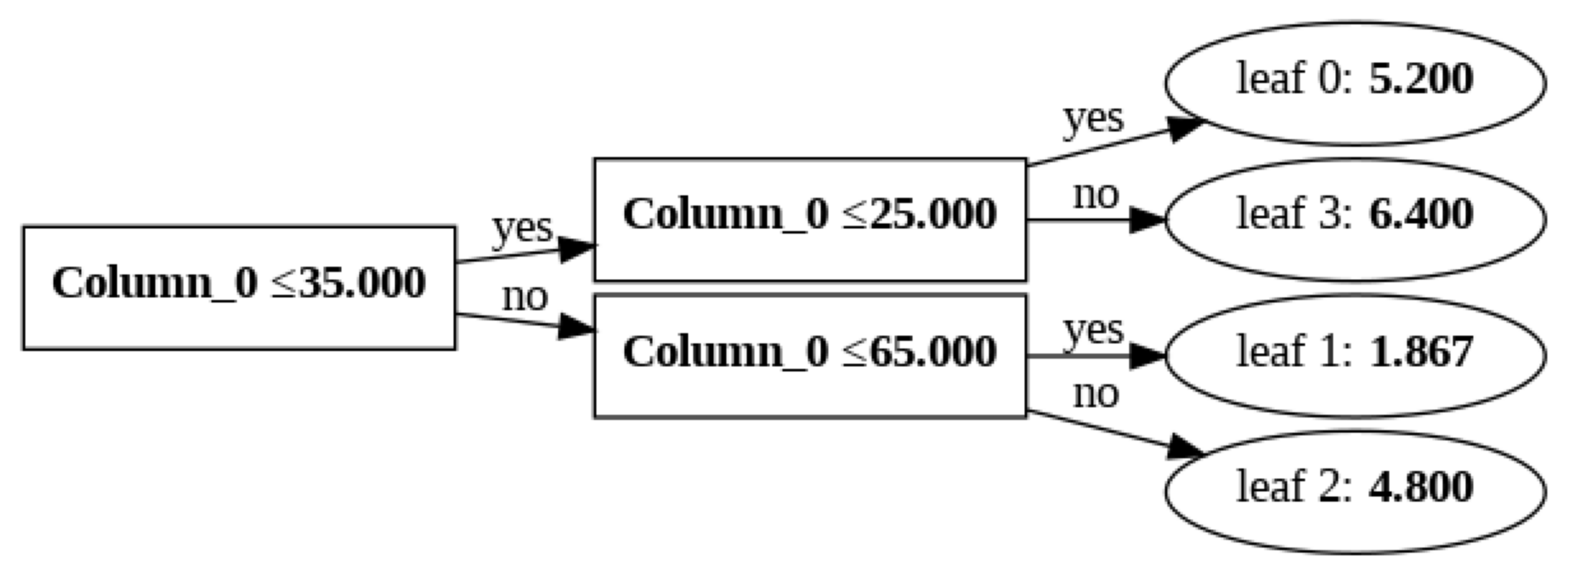

In [ ]:
# 1本目の木の可視化
lgb.plot_tree(model, tree_index=0, figsize=(20, 20))

<Axes: >

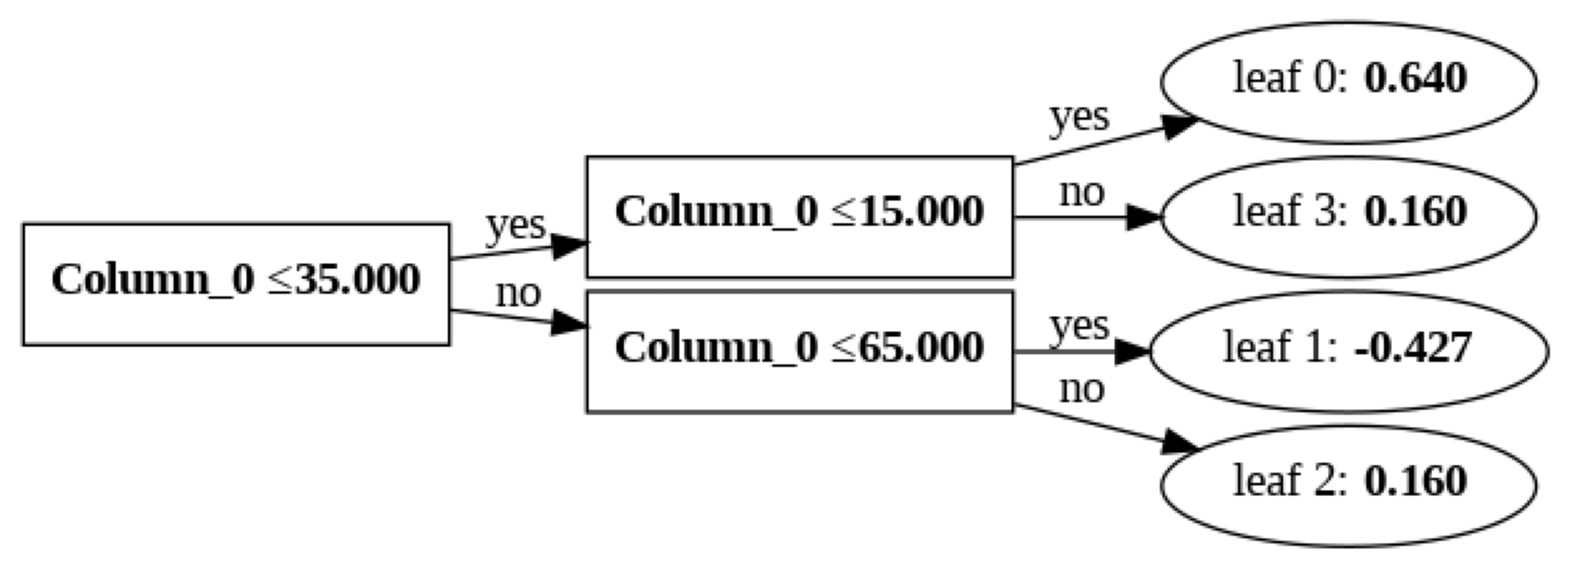

In [ ]:
# 2本目の木の可視化
lgb.plot_tree(model, tree_index=1, figsize=(20, 20))

#LightGBM(leaf-wise)の可視化

In [ ]:
# ハイパーパラメータの変更
params2 = {
    'objective': 'mse', # 損失関数
    'metric': 'mse', # 評価指標
#    'max_depth': 2, # 深さの最大値
    'num_leaves': 4, # 葉数の最大値
    'learning_rate': 0.8, # 学習率
    'min_data_in_leaf': 1, # 葉の最小のレコード数
    'max_bin': 255, # ヒストグラムの最大のbin数
    'min_data_in_bin': 1, # binの最小のレコード数
    'min_gain_to_split': 0, # 枝刈り
    'seed': 0, # 乱数
    'verbose': -1, # ログ表示
}

In [ ]:
# モデルの学習
model2 = lgb.train(params2,
                  lgb_train,
                  num_boost_round=2,
                  valid_sets=[lgb_train],
                  valid_names=['train'])

[1]	train's l2: 0.52
[2]	train's l2: 0.1704


<Axes: >

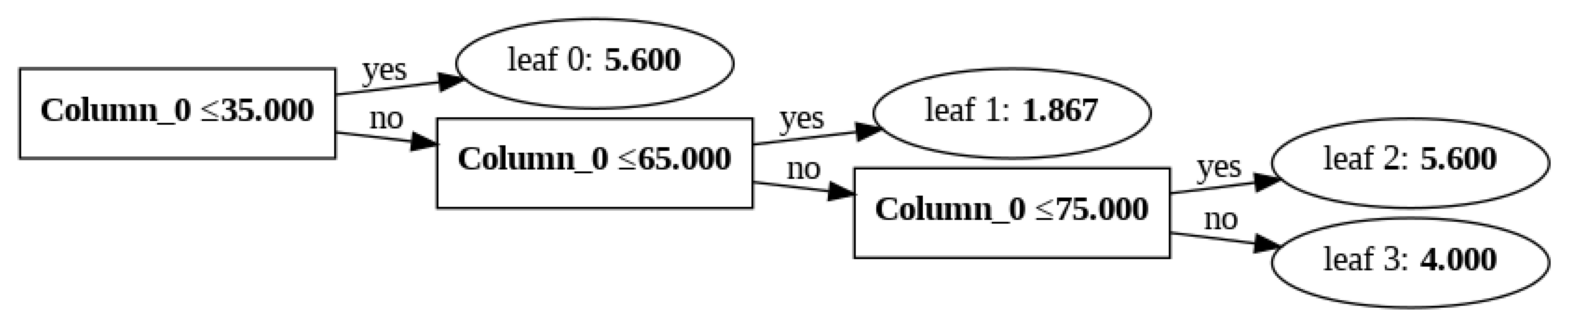

In [ ]:
# 1本目の木の可視化
lgb.plot_tree(model2, tree_index=0, figsize=(20, 20))

<Axes: >

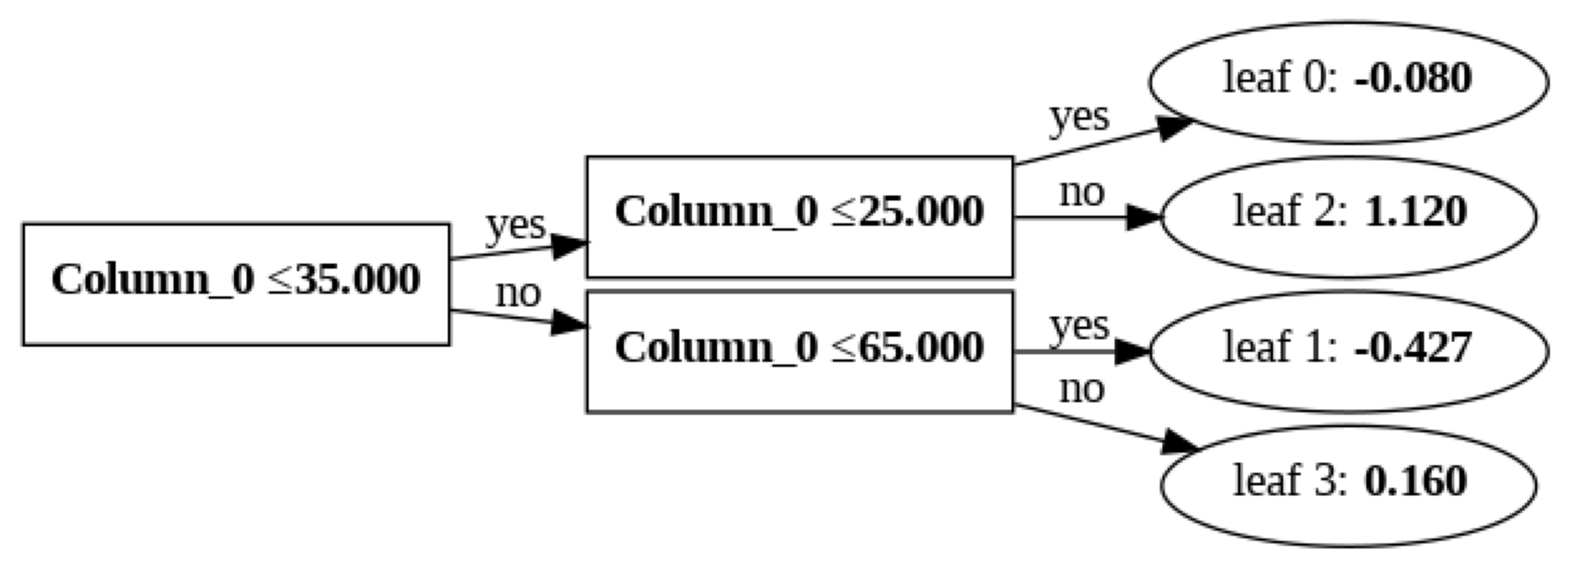

In [ ]:
# 2本目の木の可視化
lgb.plot_tree(model2, tree_index=1, figsize=(20, 20))